In [1]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


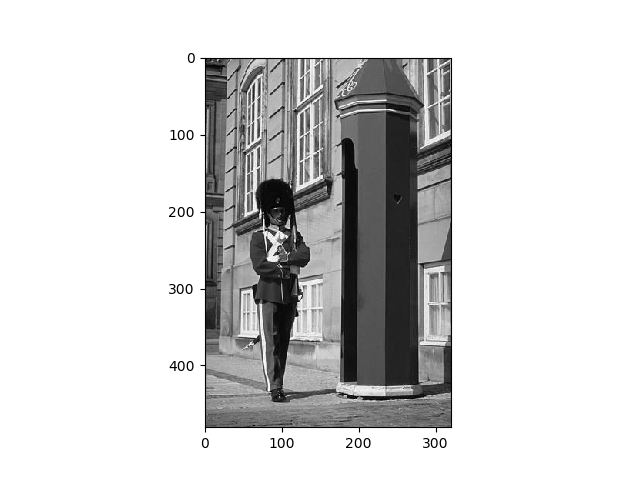

In [2]:
# Load an image
img = np.float32(imread('example.jpg'))/255.
plt.imshow(img, cmap='gray')

In [68]:
def rotate(img, theta):
    H, W = img.shape
    cy, cx = (H-1)//2, (W-1)//2
    
    out = np.zeros([H,W])
    
    # Map indices of output image back to the indices of original image
    y, x = np.meshgrid(range(H),range(W),indexing='ij')
    y, x = np.reshape(y,-1), np.reshape(x,-1)
    src_x = (x-cx)*np.cos(theta) + (y-cy)*np.sin(theta) + cx
    src_y = -(x-cx)*np.sin(theta) + (y-cy)*np.cos(theta) + cy
    
    cond1 = np.logical_and(src_x>0, src_y>0)
    cond2 = np.logical_and(src_x<W-1, src_y<H-1)
    cond = np.logical_and(cond1, cond2)
    src_x, src_y = src_x[cond], src_y[cond]
    x, y = x[cond], y[cond]

    # Bilinear iterplotation
    src_xf, src_yf = np.int32(np.floor(src_x)), np.int32(np.floor(src_y))
    src_xc, src_yc = src_xf+1, src_yf+1
#     src_xc, src_yc = np.int32(np.ceil(src_x)), np.int32(np.ceil(src_y))
    out[y, x] = (src_y-src_yf) * (src_x-src_xf)* img[src_yc,src_xc] + (src_yc-src_y) * (src_xc-src_x)* img[src_yf,src_xf]
    out[y, x] += (src_y-src_yf) * (src_xc-src_x)* img[src_yc,src_xf] + (src_yc-src_y) * (src_x-src_xf)* img[src_yf,src_xc]
    
    return out

<IPython.core.display.Javascript object>


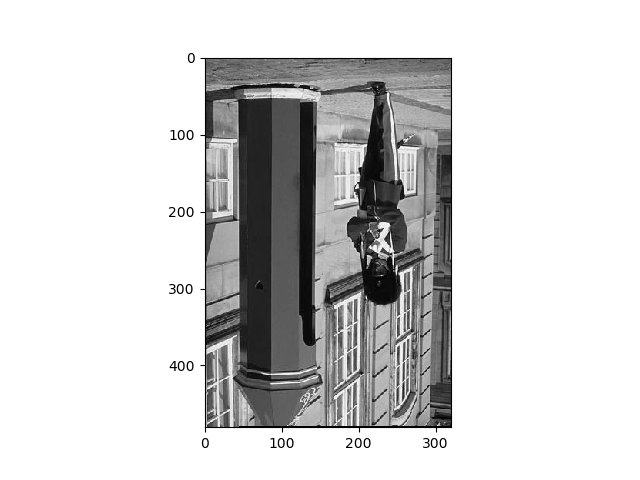

In [72]:
out = rotate(img, np.pi/1.)
    
plt.imshow(out, cmap='gray')